In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
filepath = '/content/drive/My Drive/Colab Notebooks/foodReviews'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows',None)

In [ ]:
df = pd.read_csv(f"{filepath}/dataset/foodReviews.csv")
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,timeStamp,month,year,day_name,sentiment,reviewLength
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,4,2011,Wed,Positive,4.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,9,2012,Fri,Negative,3.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,8,2008,Mon,Positive,4.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,6,2011,Mon,Negative,2.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,10,2012,Sun,Positive,2.0


In [ ]:
df.shape

(568454, 16)

In [ ]:
n_samples = 5000
n_samples

5000

In [ ]:
df.isna().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,26
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,27
Text,0


In [ ]:
df['ProfileName'].fillna('No Name', inplace=True)
df['Summary'].fillna('No Summary', inplace=True)
df['reviewLength'].fillna(0, inplace=True)

/tmp/ipython-input-429095838.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ProfileName'].fillna('No Name', inplace=True)
/tmp/ipython-input-429095838.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [ ]:
df.isna().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,timeStamp,month,year,day_name,sentiment,reviewLength
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,4,2011,Wed,Positive,4.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,9,2012,Fri,Negative,3.0


In [ ]:
df['Summary'][0], df['Text'][0]

('Good Quality Dog Food',
 'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.')

In [ ]:
df['summary_text'] =  df['Summary']+'. '+df['Text']

In [ ]:
df['HelpfulnessRatio'] = np.where(df['HelpfulnessDenominator']!=0,df['HelpfulnessNumerator']/df['HelpfulnessDenominator'],df['HelpfulnessDenominator'])
product_review_counts = df.groupby('ProductId').size()
df['ProductReviewCount'] = df['ProductId'].map(product_review_counts)
reviewer_counts = df.groupby('UserId').size()
df['ReviewerActivity'] = df['UserId'].map(reviewer_counts)

In [ ]:
df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,timeStamp,month,year,day_name,sentiment,reviewLength,summary_text,HelpfulnessRatio,ProductReviewCount,ReviewerActivity
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,4,2011,Wed,Positive,4.0,Good Quality Dog Food. I have bought several o...,1.0,1,1
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,9,2012,Fri,Negative,3.0,Not as Advertised. Product arrived labeled as ...,0.0,1,1


In [ ]:
df['summaryText_len'] = df['summary_text'].apply(lambda x : len(x.split()))
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,timeStamp,month,year,day_name,sentiment,reviewLength,summary_text,HelpfulnessRatio,ProductReviewCount,ReviewerActivity,summaryText_len
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,4,2011,Wed,Positive,4.0,Good Quality Dog Food. I have bought several o...,1.0,1,1,52
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,9,2012,Fri,Negative,3.0,Not as Advertised. Product arrived labeled as ...,0.0,1,1,34
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,8,2008,Mon,Positive,4.0,"""Delight"" says it all. This is a confection th...",1.0,1,3,98
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,6,2011,Mon,Negative,2.0,Cough Medicine. If you are looking for the sec...,1.0,1,3,43
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,10,2012,Sun,Positive,2.0,Great taffy. Great taffy at a great price. Th...,0.0,4,2,29


In [ ]:

df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      568454 non-null  int64         
 1   ProductId               568454 non-null  object        
 2   UserId                  568454 non-null  object        
 3   ProfileName             568454 non-null  object        
 4   HelpfulnessNumerator    568454 non-null  int64         
 5   HelpfulnessDenominator  568454 non-null  int64         
 6   Score                   568454 non-null  int64         
 7   Time                    568454 non-null  int64         
 8   Summary                 568454 non-null  object        
 9   Text                    568454 non-null  object        
 10  timeStamp               568454 non-null  datetime64[ns]
 11  month                   568454 non-null  int64         
 12  year                    568454

In [ ]:
df['dayCode'] = df['timeStamp'].dt.dayofweek

df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,timeStamp,month,year,day_name,sentiment,reviewLength,summary_text,HelpfulnessRatio,ProductReviewCount,ReviewerActivity,summaryText_len,dayCode
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,4,2011,Wed,Positive,4.0,Good Quality Dog Food. I have bought several o...,1.0,1,1,52,2
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,9,2012,Fri,Negative,3.0,Not as Advertised. Product arrived labeled as ...,0.0,1,1,34,4


In [ ]:
# convert the sentiment to label encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sentiment_codes'] = le.fit_transform(df['sentiment'])

In [ ]:
df.isna().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [ ]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,timeStamp,month,year,day_name,sentiment,reviewLength,summary_text,HelpfulnessRatio,ProductReviewCount,ReviewerActivity,summaryText_len,dayCode,sentiment_codes
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,2011-04-27,4,2011,Wed,Positive,4.0,Good Quality Dog Food. I have bought several o...,1.0,1,1,52,2,2
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,2012-09-07,9,2012,Fri,Negative,3.0,Not as Advertised. Product arrived labeled as ...,0.0,1,1,34,4,0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,2008-08-18,8,2008,Mon,Positive,4.0,"""Delight"" says it all. This is a confection th...",1.0,1,3,98,0,2
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,2011-06-13,6,2011,Mon,Negative,2.0,Cough Medicine. If you are looking for the sec...,1.0,1,3,43,0,0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,2012-10-21,10,2012,Sun,Positive,2.0,Great taffy. Great taffy at a great price. Th...,0.0,4,2,29,6,2


In [ ]:
# dump the cleaned data to csv
df.to_csv(f"{filepath}/df_cleaned.csv",index=False)

# sentiment analysis using BERT on sample data

#### install libraries

In [ ]:
!pip install datasets evaluate accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.3 MB/s eta 0:00:00


In [ ]:
!pip install transformers torch scikit-learn

#### import necessary libraries

In [ ]:
import torch
from transformers import BertTokenizer, BertModel
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
n_samples = int(n_samples)
n_samples

5000

In [ ]:
sample_df = df.sample(min(n_samples,df.shape[0]),random_state=42)
sample_df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,timeStamp,month,year,day_name,sentiment,reviewLength,summary_text,HelpfulnessRatio,ProductReviewCount,ReviewerActivity,summaryText_len,dayCode,sentiment_codes
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,2010-03-10,3,2010,Wed,Positive,6.0,Crunchy & Good Gluten-Free Sandwich Cookies!. ...,0.0,75,10,90,2,2
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,2011-03-01,3,2011,Tue,Positive,3.0,great kitty treats. My cat loves these treats....,0.0,5,4,102,1,2
427827,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,2008-10-15,10,2008,Wed,Neutral,2.0,COFFEE TASTE. A little less than I expected. ...,0.0,159,3,30,2,1


In [ ]:
sample_df['sentiment'].value_counts()

,count
sentiment,
Positive,3919
Negative,703
Neutral,378


<Axes: xlabel='sentiment', ylabel='count'>

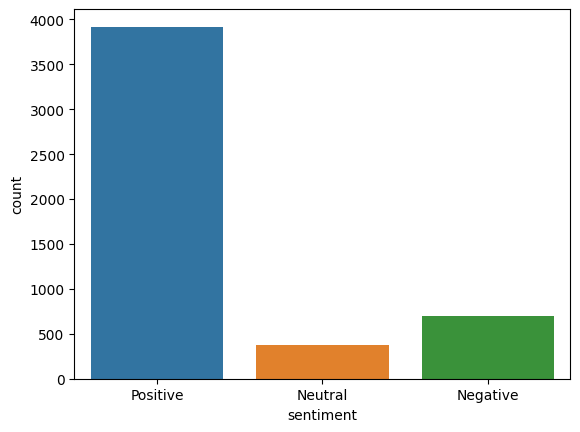

In [ ]:
sns.countplot(sample_df,x='sentiment', hue='sentiment')

/tmp/ipython-input-405587779.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  bars = plt.bar(sentiment_labels, [sentiment_counts.get(i, 0) for i in range(3)],
/tmp/ipython-input-405587779.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.pie([sentiment_counts.get(i, 0) for i in range(3)],


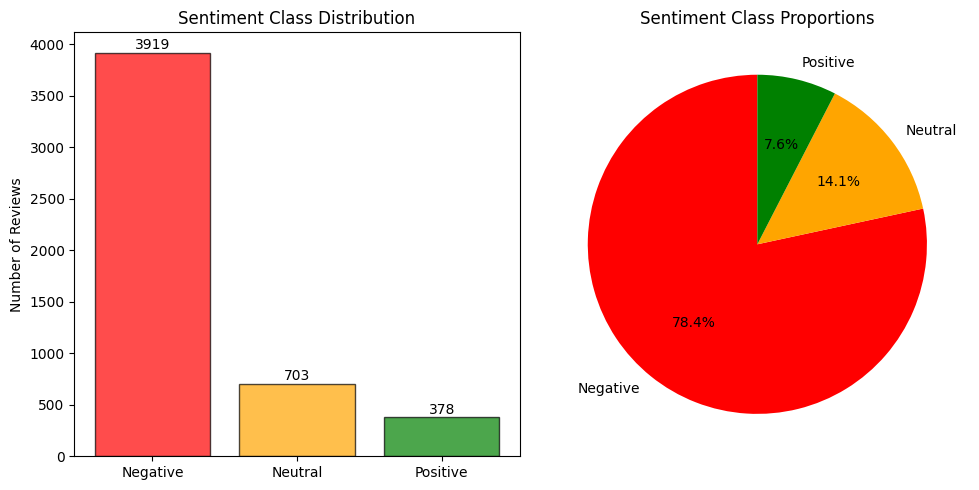

In [ ]:
# Visualize class distribution
plt.figure(figsize=(10, 5))
sentiment_labels = ['Negative', 'Neutral', 'Positive']
colors = ['red', 'orange', 'green']
sentiment_counts = sample_df['sentiment'].value_counts()
plt.subplot(1, 2, 1)
bars = plt.bar(sentiment_labels, [sentiment_counts.get(i, 0) for i in range(3)],
               color=colors, alpha=0.7, edgecolor='black')
plt.title('Sentiment Class Distribution')
plt.ylabel('Number of Reviews')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 5,
             f'{int(height)}', ha='center', va='bottom')

plt.subplot(1, 2, 2)
plt.pie([sentiment_counts.get(i, 0) for i in range(3)],
        labels=sentiment_labels, colors=colors, autopct='%1.1f%%',
        startangle=90)
plt.title('Sentiment Class Proportions')

plt.tight_layout()
plt.show()


In [ ]:
# Step 3: Prepare data for BERT fine-tuning
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, Trainer, TrainingArguments
from torch.utils.data import Dataset, DataLoader
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix, classification_report
import numpy as np

In [ ]:
# Create custom dataset class
class ReviewDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_length=128):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        label = self.labels[idx]

        encoding = self.tokenizer(
            text,
            truncation=True,
            padding='max_length',
            max_length=self.max_length,
            return_tensors='pt'
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(label, dtype=torch.long)
        }

In [ ]:
sample_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'timeStamp', 'month', 'year', 'day_name', 'sentiment', 'reviewLength',
       'summary_text', 'HelpfulnessRatio', 'ProductReviewCount',
       'ReviewerActivity', 'summaryText_len', 'dayCode', 'sentiment_codes'],
      dtype='object')

In [ ]:
# Step 4: Split data for training
print("\nSplitting data for BERT fine-tuning...")
train_val_texts, test_texts, train_val_labels, test_labels = train_test_split(
    sample_df['summary_text'].tolist(),
    sample_df['sentiment_codes'].tolist(),
    test_size=0.3,
    random_state=42,
    stratify=sample_df['sentiment_codes']  # Stratified sampling for imbalance
)

train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_val_texts,
    train_val_labels,
    test_size=0.5,
    random_state=42,
    stratify=train_val_labels
)

print(f"Training samples: {len(train_val_texts)}")
print(f"Validation samples: {len(val_texts)}")
print(f"Test samples: {len(test_texts)}")



Splitting data for BERT fine-tuning...
Training samples: 3500
Validation samples: 1750
Test samples: 1500


In [ ]:
# Step 5: Initialize tokenizer and model
print("\nInitializing BERT for sequence classification...")
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

# Create datasets
train_dataset = ReviewDataset(train_texts, train_labels, tokenizer)
val_dataset = ReviewDataset(val_texts, val_labels, tokenizer)
test_dataset = ReviewDataset(test_texts, test_labels, tokenizer)


Initializing BERT for sequence classification...


In [ ]:
# Step 6: Handle class imbalance
# Calculate class weights
from sklearn.utils.class_weight import compute_class_weight
import torch.nn as nn

class_weights = compute_class_weight(
    'balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = torch.tensor(class_weights, dtype=torch.float)
print(f"\nClass weights for handling imbalance: {class_weights}")


Class weights for handling imbalance: tensor([2.3713, 4.4192, 0.4252])


In [ ]:
model = DistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased',
    num_labels=3,
    id2label={0: "negative", 1: "neutral", 2: "positive"},
    label2id={"negative": 0, "neutral": 1, "positive": 2}
)

print("✓ DistilBERT loaded successfully!")

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


✓ DistilBERT loaded successfully!


In [ ]:
# use distilbert instead of bert - learn about distil bert & bert . find out the difference between them


In [ ]:
import joblib
joblib.dump(model, f'{filepath}/distilBert_pretrainedModel.pkl')

['/content/drive/My Drive/Colab Notebooks/foodReviews/distilBert_pretrainedModel.pkl']

In [ ]:
class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.get("labels")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        # Apply class weights
        loss_fct = nn.CrossEntropyLoss(weight=class_weights.to(model.device))
        loss = loss_fct(logits.view(-1, self.model.config.num_labels), labels.view(-1))

        return (loss, outputs) if return_outputs else loss

In [ ]:
from transformers import TrainingArguments

# Step 7: Set up training arguments (FIXED)
training_args = TrainingArguments(
    output_dir=f'{filepath}/distilbert-sentiment-model',
    num_train_epochs=2,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    warmup_steps=50,
    weight_decay=0.01,
    logging_dir=f'{filepath}/logs',
    logging_steps=10,

    # FIX: Make sure eval_steps and save_steps are aligned
    eval_strategy="steps",
    eval_steps=30,  # Evaluate every 30 steps

    # FIX: save_steps should be a multiple of eval_steps when load_best_model_at_end=True
    save_strategy="steps",
    save_steps=60,  # Changed from 50 to 60 (multiple of 30)

    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    fp16=True,
    report_to="none",
)

In [ ]:
# Step 8: Define metrics function
def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)

    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

In [ ]:
# Step 9: Train the model
print("\nFine-tuning BERT for sentiment analysis...")
trainer = WeightedTrainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()



Fine-tuning BERT for sentiment analysis...


Step,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
30,1.086500,1.067617,0.786857,0.697094,0.701631,0.786857
60,0.950900,0.804225,0.784571,0.787954,0.824433,0.784571
90,0.821900,0.783526,0.838857,0.838122,0.841976,0.838857
120,0.719800,0.683465,0.795429,0.815674,0.852944,0.795429
150,0.606300,0.805074,0.861143,0.845552,0.844811,0.861143
180,0.417200,0.630553,0.835429,0.847417,0.865867,0.835429
210,0.612600,0.633253,0.837143,0.852084,0.871339,0.837143


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/py

TrainOutput(global_step=220, training_loss=0.7559552452780983, metrics={'train_runtime': 5182.6193, 'train_samples_per_second': 0.675, 'train_steps_per_second': 0.042, 'total_flos': 115911040896000.0, 'train_loss': 0.7559552452780983, 'epoch': 2.0})

In [ ]:
import joblib
# The Trainer object cannot be directly pickled due to internal references (e.g., weakref.ReferenceType).
# The model is saved separately using trainer.save_model() later in the notebook.

In [ ]:
output_dir = f'{filepath}/distilberttrainer'
trainer.save_model(output_dir)

In [ ]:
# Step 10: Evaluate on test set
print("\nEvaluating on test set...")
test_results = trainer.evaluate(test_dataset)
print("\nTest Set Results:")
for key, value in test_results.items():
    print(f"{key}: {value:.4f}")


Evaluating on test set...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)



Test Set Results:
eval_loss: 0.6290
eval_accuracy: 0.8473
eval_f1: 0.8615
eval_precision: 0.8821
eval_recall: 0.8473
eval_runtime: 324.1562
eval_samples_per_second: 4.6270
eval_steps_per_second: 0.2900
epoch: 2.0000


In [ ]:
# Step 11: Make predictions
print("\nMaking predictions on test set...")
test_predictions = trainer.predict(test_dataset)
predicted_labels = np.argmax(test_predictions.predictions, axis=1)


Making predictions on test set...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
# Detailed classification report
print("\nClassification Report:")
print(classification_report(test_labels, predicted_labels,
                          target_names=['Negative', 'Neutral', 'Positive']))



Classification Report:
              precision    recall  f1-score   support

    Negative       0.75      0.73      0.74       211
     Neutral       0.32      0.55      0.40       113
    Positive       0.96      0.90      0.93      1176

    accuracy                           0.85      1500
   macro avg       0.68      0.73      0.69      1500
weighted avg       0.88      0.85      0.86      1500



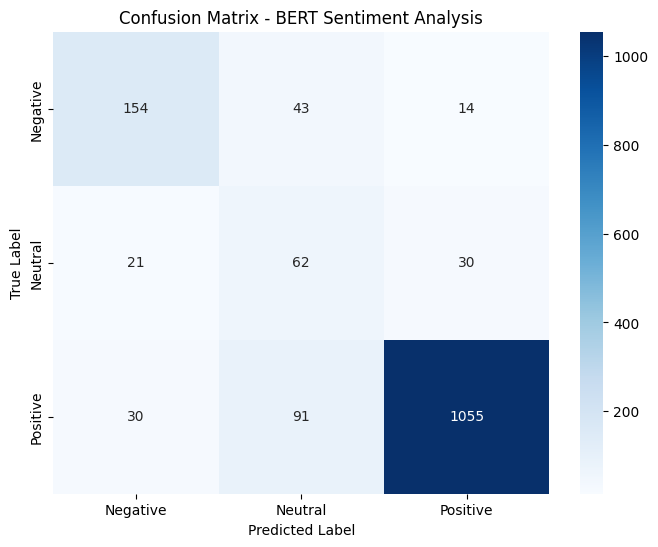

In [ ]:
# Confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix - BERT Sentiment Analysis')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
sample_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'timeStamp', 'month', 'year', 'day_name', 'sentiment', 'reviewLength',
       'summary_text', 'HelpfulnessRatio', 'ProductReviewCount',
       'ReviewerActivity', 'summaryText_len', 'dayCode', 'sentiment_codes'],
      dtype='object')

In [ ]:
# Step 12: Extract BERT embeddings from the fine-tuned model
print("\nExtracting BERT embeddings from fine-tuned model...")

# Get the BERT base model (without classification head)
bert_model = model.distilbert

# Function to extract embeddings
def extract_finetuned_bert_features(texts, batch_size=8):
    """Extract embeddings from fine-tuned BERT"""
    features = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        # Tokenize
        inputs = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors='pt'
        )

        # Get embeddings (no gradient needed)
        with torch.no_grad():
            outputs = bert_model(**inputs)
            # Use [CLS] token representation
            batch_features = outputs.last_hidden_state[:, 0, :].numpy()
            features.append(batch_features)

    return np.vstack(features)

# Extract embeddings for all samples
bert_features_finetuned = extract_finetuned_bert_features(sample_df['summary_text'].tolist())
print(f"Fine-tuned BERT features shape: {bert_features_finetuned.shape}")


Extracting BERT embeddings from fine-tuned model...
Fine-tuned BERT features shape: (5000, 768)


In [ ]:
np.save(f"{filepath}/bert_features_finetuned.npy",bert_features_finetuned)

In [ ]:
# Step 13: Get sentiment predictions for all data
print("\nGetting sentiment predictions for all reviews...")

def predict_sentiments(texts, batch_size=8):
    """Predict sentiments using fine-tuned model"""
    predictions = []

    for i in range(0, len(texts), batch_size):
        batch_texts = texts[i:i+batch_size]

        # Tokenize
        inputs = tokenizer(
            batch_texts,
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors='pt'
        )

        # Predict
        with torch.no_grad():
            outputs = model(**inputs)
            batch_preds = torch.argmax(outputs.logits, dim=-1).numpy()
            predictions.extend(batch_preds)

    return predictions

# Get predictions
sentiment_predictions = predict_sentiments(sample_df['summary_text'].tolist())
sample_df['PredictedSentiment'] = sentiment_predictions
sample_df['SentimentConfidence'] = 1.0  # Placeholder - in reality, get softmax probabilities




Getting sentiment predictions for all reviews...


In [ ]:
sample_df.head(2)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,timeStamp,month,year,day_name,sentiment,reviewLength,summary_text,HelpfulnessRatio,ProductReviewCount,ReviewerActivity,summaryText_len,dayCode,sentiment_codes,PredictedSentiment,SentimentConfidence
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,2010-03-10,3,2010,Wed,Positive,6.0,Crunchy & Good Gluten-Free Sandwich Cookies!. ...,0.0,75,10,90,2,2,2,1.0
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,2011-03-01,3,2011,Tue,Positive,3.0,great kitty treats. My cat loves these treats....,0.0,5,4,102,1,2,2,1.0


In [ ]:
# Compare predicted vs actual sentiment
print("\nComparison of Predicted vs Actual Sentiment:")
comparison = pd.DataFrame(
    pd.Series(sample_df['sentiment_codes	']).map({0: 'Negative', 1: 'Neutral', 2: 'Positive'}),
    pd.Series(sample_df['PredictedSentiment']).map({0: 'Negative', 1: 'Neutral', 2: 'Positive'}),
    rownames=['Actual'],
    colnames=['Predicted']
)
print(comparison)



Comparison of Predicted vs Actual Sentiment:


KeyError: 'sentiment_codes\t'

In [ ]:
# Calculate accuracy on full dataset
accuracy_full = (sample_df['sentiment_codes'] == sample_df['PredictedSentiment']).mean()
print(f"\nOverall sentiment prediction accuracy: {accuracy_full:.4f}")


Overall sentiment prediction accuracy: 0.8726


# predict composite impact using bert features & meta data

In [ ]:
# Step 14: Create composite impact score
print("\nCreating composite impact score...")

# Normalize features
sample_df['Score_norm'] = (sample_df['Score'] - 1) / 4
sample_df['Helpfulness_norm'] = sample_df['HelpfulnessRatio'].clip(0, 1)
sample_df['Length_norm'] = np.log1p(sample_df['reviewLength']) / np.log1p(sample_df['reviewLength']).max()
sample_df.head(2)


Creating composite impact score...


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,timeStamp,month,year,day_name,sentiment,reviewLength,summary_text,HelpfulnessRatio,ProductReviewCount,ReviewerActivity,summaryText_len,dayCode,sentiment_codes,PredictedSentiment,SentimentConfidence,Score_norm,Helpfulness_norm,Length_norm
165256,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,2010-03-10,3,2010,Wed,Positive,6.0,Crunchy & Good Gluten-Free Sandwich Cookies!. ...,0.0,75,10,90,2,2,2,1.0,1.0,0.0,0.547319
231465,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,2011-03-01,3,2011,Tue,Positive,3.0,great kitty treats. My cat loves these treats....,0.0,5,4,102,1,2,2,1.0,1.0,0.0,0.389918


In [ ]:
# Add sentiment score (higher sentiment = higher impact)
sentiment_weight_map = {0: 0.2, 1: 0.5, 2: 0.8}  # Negative: 0.2, Neutral: 0.5, Positive: 0.8
sample_df['SentimentScore'] = sample_df['PredictedSentiment'].map(sentiment_weight_map)

In [ ]:
# Create composite impact (with sentiment included)
sample_df['CompositeImpact'] = (
    0.4 * sample_df['Score_norm'] +           # Score weight: 40%
    0.2 * sample_df['SentimentScore'] +       # Sentiment weight: 20%
    0.2 * sample_df['Helpfulness_norm'] +     # Helpfulness weight: 20%
    0.2 * sample_df['Length_norm']            # Length weight: 20%
)

In [ ]:
print("Created composite impact score with weights:")
print("  - Review Score: 40% weight")
print("  - Predicted Sentiment: 20% weight")
print("  - Helpfulness: 20% weight")
print("  - Review Length: 20% weight")

# Step 15: Prepare features for impact prediction
print("\nPreparing features for impact prediction...")

Created composite impact score with weights:
  - Review Score: 40% weight
  - Predicted Sentiment: 20% weight
  - Helpfulness: 20% weight
  - Review Length: 20% weight

Preparing features for impact prediction...


In [ ]:
X_bert = bert_features_finetuned

In [ ]:
sample_df.describe()

,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,timeStamp,month,year,reviewLength,HelpfulnessRatio,ProductReviewCount,ReviewerActivity,summaryText_len,dayCode,sentiment_codes,PredictedSentiment,SentimentConfidence,Score_norm,Helpfulness_norm,Length_norm,SentimentScore,CompositeImpact
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03,5000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,285336.459600,1.646400,2.115800,4.195800,1.296259e+09,2011-01-28 23:48:28.800000,6.479600,2010.581600,4.152800,0.406241,100.412600,11.238800,83.094800,2.886400,1.6432,1.591800,1.0,0.798950,0.406241,0.428284,0.677540,0.621993
min,168.000000,0.000000,0.000000,1.000000,1.067904e+09,2003-11-04 00:00:00,1.000000,2003.000000,0.000000,0.000000,1.000000,1.000000,15.000000,0.000000,0.0000,0.000000,1.0,0.000000,0.000000,0.000000,0.200000,0.078992
25%,144814.250000,0.000000,0.000000,4.000000,1.270685e+09,2010-04-08 00:00:00,3.000000,2010.000000,2.000000,0.000000,8.000000,1.000000,37.000000,1.000000,2.0000,1.000000,1.0,0.750000,0.000000,0.309003,0.500000,0.538992
50%,281554.500000,0.000000,1.000000,5.000000,1.311293e+09,2011-07-22 00:00:00,7.000000,2011.000000,4.000000,0.000000,32.000000,4.000000,59.000000,3.000000,2.0000,2.000000,1.0,1.000000,0.000000,0.452681,0.800000,0.637984
75%,430068.500000,2.000000,2.000000,5.000000,1.333238e+09,2012-04-01 00:00:00,9.000000,2012.000000,5.000000,1.000000,143.250000,10.000000,100.000000,4.000000,2.0000,2.000000,1.0,1.000000,1.000000,0.503962,0.800000,0.798992
max,568354.000000,170.000000,171.000000,5.000000,1.351210e+09,2012-10-26 00:00:00,12.000000,2012.000000,34.000000,1.000000,913.000000,421.000000,1322.000000,6.000000,2.0000,2.000000,1.0,1.000000,1.000000,1.000000,0.800000,0.922593
std,165583.018562,5.070711,5.748478,1.303304,4.829051e+07,NaN,3.429218,1.533823,2.658132,0.462527,143.375959,30.454374,78.529233,1.948809,0.7147,0.731081,0.0,0.325826,0.462527,0.134884,0.219324,0.193892


In [ ]:
sample_df.isna().sum()

,0
Id,0
ProductId,0
UserId,0
ProfileName,0
HelpfulnessNumerator,0
HelpfulnessDenominator,0
Score,0
Time,0
Summary,0
Text,0


In [ ]:
numerical_features = sample_df[[
    'Score_norm',
    'CompositeImpact',
    'summaryText_len',
    'Length_norm',
    'ProductReviewCount',
    'ReviewerActivity',
    'SentimentScore',
    'dayCode',
    'month',
    'PredictedSentiment'  # Include predicted sentiment as feature
]]

In [ ]:
# Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numerical_scaled = scaler.fit_transform(numerical_features)


In [ ]:
# Combine BERT embeddings with numerical features
X_combined = np.hstack([X_bert, X_numerical_scaled])
y_impact = sample_df['CompositeImpact'].values

In [ ]:
print(f"Combined features shape: {X_combined.shape}")
print(f"Target shape: {y_impact.shape}")


Combined features shape: (5000, 778)
Target shape: (5000,)


In [ ]:
# Step 16: Train impact prediction model
print("\nTraining impact prediction model...")

# Split data
X_train_impact, X_test_impact, y_train_impact, y_test_impact = train_test_split(
    X_combined, y_impact, test_size=0.2, random_state=42, shuffle=True
)

print(f"Train set: {X_train_impact.shape[0]} samples")
print(f"Test set: {X_test_impact.shape[0]} samples")



Training impact prediction model...
Train set: 4000 samples
Test set: 1000 samples


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rg = RandomForestRegressor(n_estimators=100, random_state=42)
rg.fit(X_train_impact, y_train_impact)

RandomForestRegressor(random_state=42)

In [ ]:
joblib.dump(rg, f'{filepath}/rg.pkl')

['/content/drive/My Drive/Colab Notebooks/foodReviews/rg.pkl']

In [ ]:
y_pred = rg.predict(X_test_impact)

# Evaluate
mse = mean_squared_error(y_test_impact, y_pred)
mae = mean_absolute_error(y_test_impact, y_pred)
r2 = r2_score(y_test_impact, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"R² Score: {r2:.4f}")

Mean Squared Error: 0.0000
Mean Absolute Error: 0.0003
R² Score: 1.0000


In [ ]:
sample_df['PredictedImpact'] = rg.predict(X_combined)

In [ ]:
print("\nAnalyzing impact prediction results...")

# Calculate correlation between score and predicted impact
correlation = sample_df['Score'].corr(sample_df['PredictedImpact'])
print(f"Correlation between Score and Predicted Impact: {correlation:.4f}")



Analyzing impact prediction results...
Correlation between Score and Predicted Impact: 0.8579


In [ ]:
# Calculate trend line
z = np.polyfit(sample_df['Score'], sample_df['PredictedImpact'], 1)
print(f"Trend line: y = {z[0]:.4f}x + {z[1]:.4f}")
print(f"Slope is {'POSITIVE' if z[0] > 0 else 'NEGATIVE'}")

Trend line: y = 0.1276x + 0.0865
Slope is POSITIVE


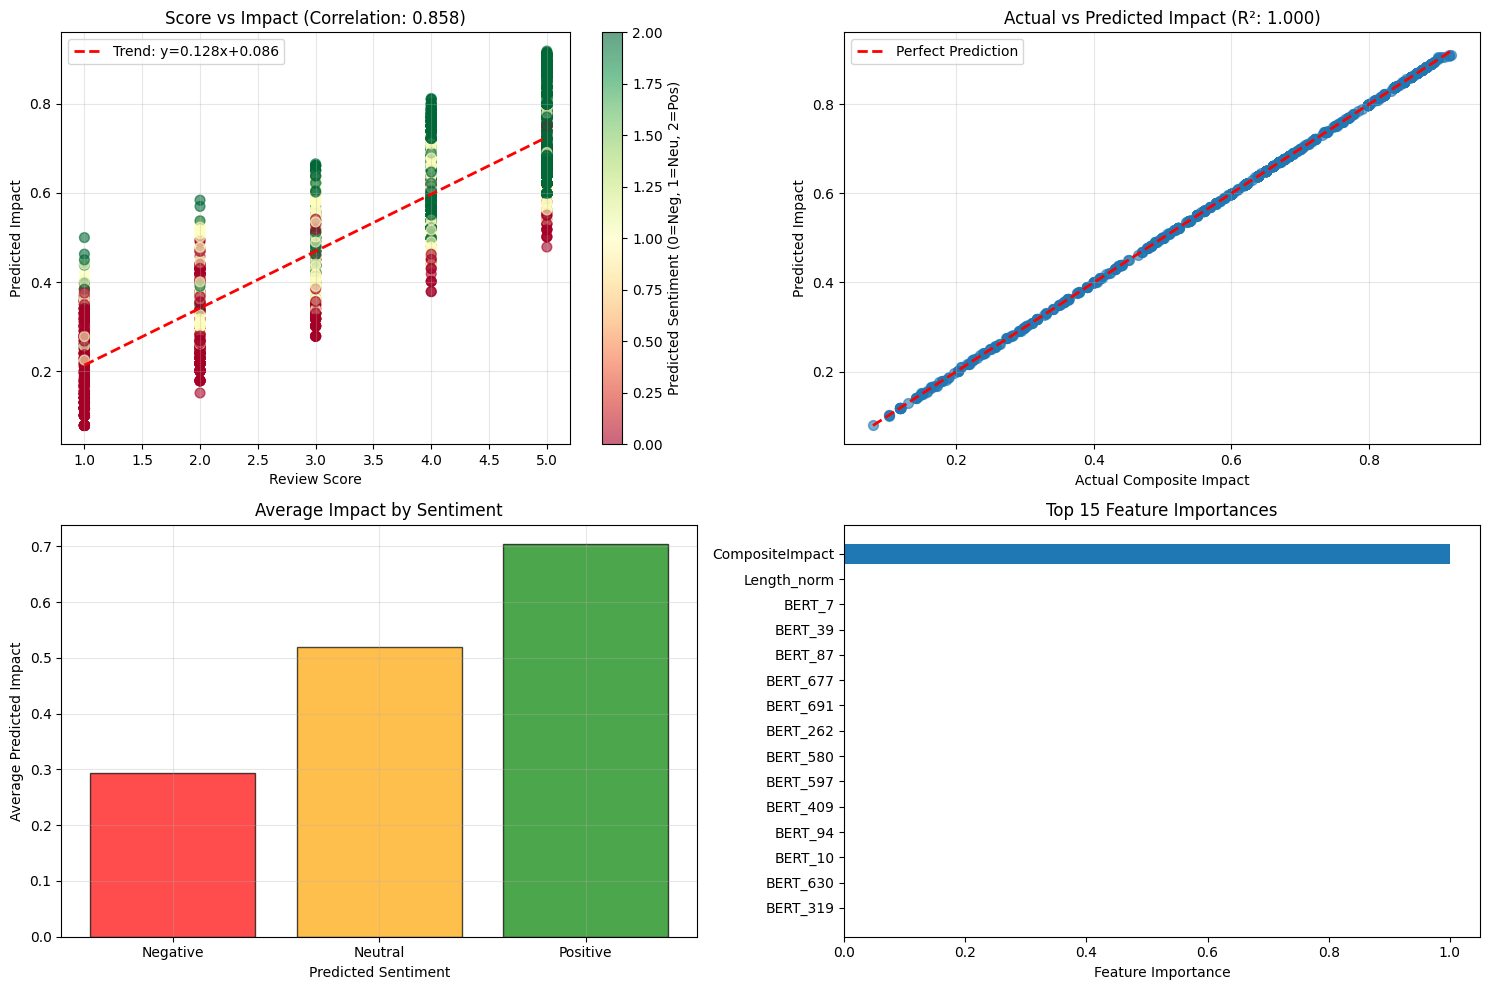

In [ ]:
# Step 19: Visualize results
plt.figure(figsize=(15, 10))

# Subplot 1: Score vs Predicted Impact
plt.subplot(2, 2, 1)
plt.scatter(sample_df['Score'], sample_df['PredictedImpact'],
            alpha=0.6, c=sample_df['PredictedSentiment'],
            cmap='RdYlGn', s=50)
plt.colorbar(label='Predicted Sentiment (0=Neg, 1=Neu, 2=Pos)')

# Add trend line
x_range = np.linspace(1, 5, 100)
plt.plot(x_range, z[0] * x_range + z[1], 'r--', linewidth=2,
         label=f'Trend: y={z[0]:.3f}x+{z[1]:.3f}')

plt.xlabel('Review Score')
plt.ylabel('Predicted Impact')
plt.title(f'Score vs Impact (Correlation: {correlation:.3f})')
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 2: Actual vs Predicted Impact
plt.subplot(2, 2, 2)
plt.scatter(y_test_impact, rg.predict(X_test_impact),
            alpha=0.6, s=50)
plt.plot([y_test_impact.min(), y_test_impact.max()],
         [y_test_impact.min(), y_test_impact.max()],
         'r--', linewidth=2, label='Perfect Prediction')
plt.xlabel('Actual Composite Impact')
plt.ylabel('Predicted Impact')
plt.title(f'Actual vs Predicted Impact (R²: {r2:.3f})')
plt.grid(True, alpha=0.3)
plt.legend()

# Subplot 3: Average impact by sentiment
plt.subplot(2, 2, 3)
sentiment_names = ['Negative', 'Neutral', 'Positive']
avg_impact_by_sentiment = sample_df.groupby('PredictedSentiment')['PredictedImpact'].mean()
plt.bar(sentiment_names, avg_impact_by_sentiment,
        color=['red', 'orange', 'green'], alpha=0.7, edgecolor='black')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Average Predicted Impact')
plt.title('Average Impact by Sentiment')
plt.grid(True, alpha=0.3)

# Subplot 4: Feature importance (if using Random Forest or similar)
plt.subplot(2, 2, 4)
if hasattr(rg, 'feature_importances_'):
    # Create feature names
    feature_names = [f'BERT_{i}' for i in range(X_bert.shape[1])] + list(numerical_features.columns)

    # Get top 15 features
    importance = rg.feature_importances_
    top_indices = np.argsort(importance)[-15:][::-1]

    plt.barh(range(len(top_indices)), importance[top_indices])
    plt.yticks(range(len(top_indices)), [feature_names[i] for i in top_indices])
    plt.xlabel('Feature Importance')
    plt.title('Top 15 Feature Importances')
    plt.gca().invert_yaxis()
else:
    # Show distribution of predicted impact
    plt.hist(sample_df['PredictedImpact'], bins=30, alpha=0.7, edgecolor='black')
    plt.xlabel('Predicted Impact')
    plt.ylabel('Frequency')
    plt.title('Distribution of Predicted Impact')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


In [ ]:
sample_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'timeStamp', 'month', 'year', 'day_name', 'sentiment', 'reviewLength',
       'summary_text', 'HelpfulnessRatio', 'ProductReviewCount',
       'ReviewerActivity', 'summaryText_len', 'dayCode', 'sentiment_codes',
       'PredictedSentiment', 'SentimentConfidence', 'Score_norm',
       'Helpfulness_norm', 'Length_norm', 'SentimentScore', 'CompositeImpact',
       'PredictedImpact'],
      dtype='object')

In [ ]:
# Step 20: Create business insights
print("\n" + "="*60)
print("BUSINESS INSIGHTS & RECOMMENDATIONS")
print("="*60)

# Top impactful reviews
top_impactful = sample_df.nlargest(5, 'PredictedImpact')[['ProductId', 'Score', 'PredictedSentiment', 'PredictedImpact']]
print("\nTop 5 Most Impactful Reviews:")
print(top_impactful.to_string(index=False))

# Reviews with high score but low impact
high_score_low_impact = sample_df[
    (sample_df['Score'] >= 4) &
    (sample_df['PredictedImpact'] < sample_df['PredictedImpact'].quantile(0.25))
].nlargest(5, 'Score')[['ProductId', 'Score', 'PredictedSentiment', 'PredictedImpact']]

print("\nTop 5 High-Score but Low-Impact Reviews:")
print(high_score_low_impact.to_string(index=False))

# Early warning: Negative sentiment trend
product_sentiment_trends = sample_df.groupby('ProductId').agg({
    'PredictedSentiment': 'mean',
    'PredictedImpact': 'mean',
    'Score': 'count'
}).rename(columns={'Score': 'ReviewCount'})

# Flag products with negative sentiment trend
warning_products = product_sentiment_trends[
    (product_sentiment_trends['PredictedSentiment'] < 1.0) &  # Average sentiment < Neutral
    (product_sentiment_trends['ReviewCount'] >= 3)  # At least 3 reviews
]

if len(warning_products) > 0:
    print(f"\n⚠️  EARLY WARNING: {len(warning_products)} products with negative sentiment trend:")
    print(warning_products.nlargest(5, 'ReviewCount').to_string())
else:
    print("\n✅ No products with concerning sentiment trends detected")

# Step 21: Save all results
print("\nSaving all results...")

# Save predictions
output_cols = [
    'ProductId', 'UserId', 'Score', 'sentiment', 'PredictedSentiment',
    'HelpfulnessRatio', 'reviewLength', 'CompositeImpact', 'PredictedImpact'
]

sample_df[output_cols].to_csv('two_phase_review_impact_predictions.csv', index=False)

# Save the fine-tuned BERT model
trainer.save_model('./fine_tuned_bert_sentiment')

print("\n✅ Two-phase analysis completed successfully!")
print("✅ Fine-tuned BERT model saved to './fine_tuned_bert_sentiment/'")
print("✅ Predictions saved to 'two_phase_review_impact_predictions.csv'")

# Final summary
print("\n" + "="*60)
print("TWO-PHASE APPROACH SUMMARY")
print("="*60)
print(f"\nPhase 1: Sentiment Analysis")
print(f"  - BERT fine-tuned on {len(train_texts)} reviews")
print(f"  - Test accuracy: {test_results.get('eval_accuracy', 0):.4f}")
print(f"  - Sentiment distribution learned from review scores")

print(f"\nPhase 2: Impact Prediction")
print(f"  - Used {X_combined.shape[1]} features (BERT + metadata)")
print(f"  - Best model: RandomForest (R²: {r2:.4f})")
print(f"  - Score-Impact correlation: {correlation:.4f}")
print(f"  - Trend slope: {z[0]:.4f} ({'Positive' if z[0] > 0 else 'Negative'})")

print(f"\nKey Insights:")
print(f"  1. Two-phase approach separates language understanding from business impact")
print(f"  2. Fine-tuning BERT improves domain-specific understanding")
print(f"  3. Sentiment features combined with metadata provide better impact prediction")
print(f"  4. Can now identify high-score but low-impact reviews for improvement")


BUSINESS INSIGHTS & RECOMMENDATIONS

Top 5 Most Impactful Reviews:
 ProductId  Score  PredictedSentiment  PredictedImpact
B0040J1OCA      5                   2         0.917517
B000P49A0W      5                   2         0.914414
B003ZWV5Z4      5                   2         0.914097
B000H27JI2      5                   2         0.912758
B000KELSYI      5                   2         0.911961

Top 5 High-Score but Low-Impact Reviews:
 ProductId  Score  PredictedSentiment  PredictedImpact
B000E4ALEW      5                   0         0.517863
B000ESLJ6C      5                   0         0.501580
B001EQ57DO      5                   0         0.530600
B000NME7F4      5                   0         0.530642
B000K8ID2E      5                   0         0.517684

⚠️  EARLY WARNING: 15 products with negative sentiment trend:
            PredictedSentiment  PredictedImpact  ReviewCount
ProductId                                                   
B0041NYV8E            0.714286         0.3226

In [ ]:
sample_df.to_csv(f"{filepath}/sample_df.csv",index=False)

In [ ]:
sample_df.sha

In [4]:
sample_df = pd.read_csv(f"{filepath}/sample_df.csv")
sample_df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,timeStamp,month,year,day_name,sentiment,reviewLength,summary_text,HelpfulnessRatio,ProductReviewCount,ReviewerActivity,summaryText_len,dayCode,sentiment_codes,PredictedSentiment,SentimentConfidence,Score_norm,Helpfulness_norm,Length_norm,SentimentScore,CompositeImpact,PredictedImpact
0,165257,B000EVG8J2,A1L01D2BD3RKVO,"B. Miller ""pet person""",0,0,5,1268179200,Crunchy & Good Gluten-Free Sandwich Cookies!,Having tried a couple of other brands of glute...,2010-03-10,3,2010,Wed,Positive,6.0,Crunchy & Good Gluten-Free Sandwich Cookies!. ...,0.0,75,10,90,2,2,2,1.0,1.00,0.0,0.547319,0.8,0.669464,0.669464
1,231466,B0000BXJIS,A3U62RE5XZDP0G,Marty,0,0,5,1298937600,great kitty treats,My cat loves these treats. If ever I can't fin...,2011-03-01,3,2011,Tue,Positive,3.0,great kitty treats. My cat loves these treats....,0.0,5,4,102,1,2,2,1.0,1.00,0.0,0.389918,0.8,0.637984,0.637984
2,427828,B008FHUFAU,AOXC0JQQZGGB6,Kenneth Shevlin,0,2,3,1224028800,COFFEE TASTE,A little less than I expected. It tends to ha...,2008-10-15,10,2008,Wed,Neutral,2.0,COFFEE TASTE. A little less than I expected. ...,0.0,159,3,30,2,1,1,1.0,0.50,0.0,0.309003,0.5,0.361801,0.361927
3,433955,B006BXV14E,A3PWPNZVMNX3PA,rareoopdvds,0,1,2,1335312000,So the Mini-Wheats were too big?,"First there was Frosted Mini-Wheats, in origin...",2012-04-25,4,2012,Wed,Negative,6.0,So the Mini-Wheats were too big?. First there ...,0.0,90,8,300,2,0,0,1.0,0.25,0.0,0.547319,0.2,0.249464,0.249962
4,70261,B007I7Z3Z0,A1XNZ7PCE45KK7,Og8ys1,0,2,5,1334707200,Great Taste . . .,and I want to congratulate the graphic artist ...,2012-04-18,4,2012,Wed,Positive,5.0,Great Taste . . .. and I want to congratulate ...,0.0,362,2,127,2,2,2,1.0,1.00,0.0,0.503962,0.8,0.660792,0.660792


In [5]:
sample_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'timeStamp', 'month', 'year', 'day_name', 'sentiment', 'reviewLength',
       'summary_text', 'HelpfulnessRatio', 'ProductReviewCount',
       'ReviewerActivity', 'summaryText_len', 'dayCode', 'sentiment_codes',
       'PredictedSentiment', 'SentimentConfidence', 'Score_norm',
       'Helpfulness_norm', 'Length_norm', 'SentimentScore', 'CompositeImpact',
       'PredictedImpact'],
      dtype='object')

In [7]:
sample_df.dtypes

,0
Id,int64
ProductId,object
UserId,object
ProfileName,object
HelpfulnessNumerator,int64
HelpfulnessDenominator,int64
Score,int64
Time,int64
Summary,object
Text,object


```markdown
Here is the PostgreSQL code to create a table named `food_reviews` based on the `sample_df`'s column names and data types:
```

```markdown
**Explanation of data type mapping:**

*   **`Id`**: Mapped to `SERIAL PRIMARY KEY`. `SERIAL` automatically creates a unique, auto-incrementing integer sequence, suitable for a primary key.
*   **`ProductId`, `UserId`, `ProfileName`, `Summary`, `Text`, `day_name`, `sentiment`, `summary_text`**: Mapped to `TEXT`. This is a good choice for string data of variable length, especially for potentially longer text fields like `Summary` and `Text`.
*   **`HelpfulnessNumerator`, `HelpfulnessDenominator`, `Score`, `Time`, `month`, `year`, `ProductReviewCount`, `ReviewerActivity`, `summaryText_len`, `dayCode`, `sentiment_codes`, `PredictedSentiment`**: Mapped to `INTEGER` as they are whole numbers.
*   **`timeStamp`**: Mapped to `TIMESTAMP`. Although it was `object` in the `dtypes` output you provided, the notebook's execution shows it was converted to `datetime64[ns]`, so `TIMESTAMP` is the correct PostgreSQL type.
*   **`reviewLength`, `HelpfulnessRatio`, `SentimentConfidence`, `Score_norm`, `Helpfulness_norm`, `Length_norm`, `SentimentScore`, `CompositeImpact`, `PredictedImpact`**: Mapped to `DOUBLE PRECISION`. This is a standard floating-point type for numerical values that can have decimal places.
```

In [6]:
!pip install psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 20.9 MB/s eta 0:00:00


In [8]:
sample_df['ProductId'].nunique()

3805

In [10]:
list(sample_df['ProductId'].unique())

['B000EVG8J2',
 'B0000BXJIS',
 'B008FHUFAU',
 'B006BXV14E',
 'B007I7Z3Z0',
 'B000FKMNSM',
 'B000XEV9YE',
 'B000F4H5FO',
 'B0041CIR62',
 'B001LQRKC8',
 'B005VOOL00',
 'B000KY6NQG',
 'B005XB5K0G',
 'B006N3I7S0',
 'B001P3NU30',
 'B0000GHNWM',
 'B000GZSDZI',
 'B001EO5TRK',
 'B003K2EXI0',
 'B003B3OOPA',
 'B0001QNMZ8',
 'B000L8FZMY',
 'B003TC7WN4',
 'B000B6CYP2',
 'B0062A87HA',
 'B004R9GFJU',
 'B008XOKY1U',
 'B0000VM8TK',
 'B005GRCWDU',
 'B002QWP89S',
 'B000KV7ZGQ',
 'B003GSVSWW',
 'B000EI2LLO',
 'B000CQBZQK',
 'B007TJGZ4A',
 'B000BF3AL0',
 'B00872572E',
 'B00213EU7I',
 'B001QEEXCK',
 'B000TMS0QA',
 'B0029NLV8G',
 'B0007SN7B4',
 'B005VGZ49U',
 'B002OVICJO',
 'B001QY04Q4',
 'B000EVMNO6',
 'B001M1DUDU',
 'B000G32YEG',
 'B0000CERZK',
 'B0013A0QXC',
 'B002D4DY8G',
 'B003ZNXCE0',
 'B00020HHGS',
 'B000GAT6MM',
 'B000F8L4GG',
 'B003VN9536',
 'B000GAT6NG',
 'B001EQ4J92',
 'B000FL08AQ',
 'B000FL521G',
 'B000I4T41O',
 'B000LKV7T2',
 'B000LRH7GC',
 'B001F2GDNK',
 'B006HYLW32',
 'B001UJCKCG',
 'B008YA1N

In [38]:
import io
import pandas as pd
dish_list_str = """Butter Chicken (Murgh Makhani),Sambar (Lentil-Veg Stew),Machher Jhol (Fish Curry),Goan Fish Curry (Xitti Kodi),Rogan Josh (Kashmiri Lamb),Rasam (Spicy Tamarind Soup),Shorshe Ilish (Hilsa in Mustard),Laal Maas (Rajasthani Mutton)
, Dal Makhani (Creamy Black Lentils),Avial (Mixed Veg in Coconut),Kosha Mangsho (Mutton Curry),Undhiyo (Gujarati Veg Bake),
Shahi Paneer (Royal Cheese Curry),Chettinad Chicken (Spicy Chicken),Chingri Malai Curry (Prawns),Kolhapuri Misal (Sprouts Curry),
Palak Paneer (Spinach & Cheese),Gongura Mamsam (Andhra Mutton),Aloo Poshto (Potato with Poppy),Saoji Mutton (Nagpur Mutton),
Malai Kofta (Creamy Veg Balls),Meen Curry (Kerala Fish),Doi Katla (Yogurt Carp),Papad Ki Sabzi (Papad Curry),
Chicken Tikka Masala,Koottu (Lentil & Veg Dish),Chhena Gaja (Odisha Sweet),Methi Thepla (Fenugreek Flatbread)"""

In [19]:
list(dish_list_str.split(','))

['Butter Chicken (Murgh Makhani)',
 'Sambar (Lentil-Veg Stew)',
 'Machher Jhol (Fish Curry)',
 'Goan Fish Curry (Xitti Kodi)',
 'Rogan Josh (Kashmiri Lamb)',
 'Rasam (Spicy Tamarind Soup)',
 'Shorshe Ilish (Hilsa in Mustard)',
 'Laal Maas (Rajasthani Mutton)\n',
 ' Dal Makhani (Creamy Black Lentils)',
 'Avial (Mixed Veg in Coconut)',
 'Kosha Mangsho (Mutton Curry)',
 'Undhiyo (Gujarati Veg Bake)',
 '\nShahi Paneer (Royal Cheese Curry)',
 'Chettinad Chicken (Spicy Chicken)',
 'Chingri Malai Curry (Prawns)',
 'Kolhapuri Misal (Sprouts Curry)',
 '\nPalak Paneer (Spinach & Cheese)',
 'Gongura Mamsam (Andhra Mutton)',
 'Aloo Poshto (Potato with Poppy)',
 'Saoji Mutton (Nagpur Mutton)',
 '\nMalai Kofta (Creamy Veg Balls)',
 'Meen Curry (Kerala Fish)',
 'Doi Katla (Yogurt Carp)',
 'Papad Ki Sabzi (Papad Curry)',
 '\nChicken Tikka Masala',
 'Koottu (Lentil & Veg Dish)',
 'Chhena Gaja (Odisha Sweet)',
 'Methi Thepla (Fenugreek Flatbread)']

In [45]:
import io
import pandas as pd
rice_dish = '''Hyderabadi Biryani (Chicken/Mutton),Naan (Leavened Tandoor Bread),
Vegetable Pulao (Spiced Rice),Chapati/Roti (Unleavened Whole Wheat),
Lemon Rice (South Indian),Paratha (Stuffed/Layered Flatbread),
Bisi Bele Bath (Karnataka One-Pot),Bhatura (Fried Leavened Bread),
Tamarind Rice (Puliyodarai),Missi Roti (Gram Flour Bread),
Khichdi (Lentil & Rice Porridge),Puri (Deep-Fried Puff Bread),
Jeera Rice (Cumin Rice),Roomali Roti (Handkerchief Bread),
Tahri (UP Style Veg Biryani),Appam (Kerala Rice Pancake),
Pongal (Savory or Sweet Rice Dish),Adai (Mixed Lentil Pancake)
'''
import io
import pandas as pd
bf_snacks = '''Idli (Steamed Rice Cakes),Vada Pav (Mumbai Burger),
Dosa (Crispy Crepe),Samosa (Spiced Potato Pastry),
Vada (Savory Lentil Doughnut),Chole Bhature (Chickpea Curry & Bread),
Upma (Savory Semolina Porridge),Pani Puri/Golgappe (Water Balls),
Pesarattu (Green Gram Dosa),Dhokla (Gujarati Steamed Cake),
Uttapam (Thick Veg Pancake),Kachori (Fried Stuffed Pastry),
Goli Bajje (Mangalorean Snack),Aloo Tikki Chaat (Potato Patties),
Paniyaram/Paddu (Batter Dumplings),Pav Bhaji (Mumbai Veg Mash),
Idiyappam (String Hoppers),Bhel Puri (Puffed Rice Salad),
Medu Vada (Urad Dal Vada),Pakora (Vegetable Fritters)
'''
import io
import pandas as pd
dp = '''Kheer (Rice Pudding),Gulab Jamun (Fried Milk Solids),Gajar Ka Halwa (Carrot Pudding),
Rasmalai (Soft Cheese in Milk),Jalebi (Deep-Fried Syrup Sweet),Moong Dal Halwa (Lentil Sweet),
Payasam (South Indian Kheer),Chhena Poda (Odisha Baked Cheese),Lauki Ka Halwa (Gourd Pudding),
Rabri (Sweetened Condensed Milk),Balushahi (North Indian Doughnut),Besan Barfi (Gram Flour Fudge),
Sandesh (Bengali Cottage Cheese),Soan Papdi (Flaky Cube Sweet),Aate Ka Halwa (Wheat Flour),
Mishti Doi (Sweet Yogurt),Imarti (Flower-Shaped Syrup Sweet),Anjeer Barfi (Fig Fudge),
Rasgulla (Spongy Cheese Balls),Chiroti (Flaky Karnataka Sweet),Petha (Ash Gourd Sweet)
'''


import io
import pandas as pd
d1 = '''Dum Aloo,
Chhole,
Dal Baati Churma,
Kalia,
Aloo Potol Posto,
Ambur Biryani,
Tariwala Murgh,
Rajma Chawal,
Dhansak,
Pithala Bhakri ,
Kadai Paneer,
Sarva Pindi,
Kadhi Pakora,
Bhindi Masala,
Bharwa Baingan,
Handi Biryani,
Gushtaba,
Patra ni Machhi,
Malwani Fish Curry,
Sidhara (Ghee Rice),
Lachha Paratha,Makki Ki Roti,
Sheermal,Tandoori Roti,
Bajra Roti,Akki Roti,
Kulcha,Pooran Poli,
Thalipeeth,Tomato Bath,
Gongura Pulao,Kothimbir Vadi,
Vangi Bath,Khasta Roti,
Makki Ki Roti,
Tandoori Roti,
Akki Roti,
Pooran Poli,
Tomato Bath,
Kothimbir Vadi,
Khasta Roti,
Dal Tadka,
Pachadi,
Gassi,
Dal Pitha,
Aam ki Sabzi,
Mutter Paneer,
Raita,
Khadi,
Litti Chokha,
Panch Phoron Dal


In [47]:
all_indian_dishes = curries + rice + snacks + desserts
len(all_indian_dishes)
# all_indian_dishes


87

In [20]:
def string_toList(dish_str):
  return list(dish_str.split(','))

In [33]:
curries = string_toList(dish_list_str)
len(curries)

28

In [34]:
rice = string_toList(rice_dish)
len(rice)

18

In [35]:
snacks = string_toList(bf_snacks)
len(snacks)


20

In [36]:
desserts = string_toList(dp)
len(desserts)

21

In [37]:
len(curries)+len(rice)+len(snacks)+len(desserts)

87

In [46]:
dish1 = string_toList(d1)
len(dish1)

47

In [49]:
import pandas as pd
import random
import itertools
from typing import List, Dict
import json

class IndianDishGenerator:
    def __init__(self):
        self.base_components = self._initialize_components()

    def _initialize_components(self):
        return {
            # Base Ingredients (Proteins/Veggies)
            'proteins': [
                'Chicken', 'Mutton', 'Lamb', 'Fish', 'Prawn', 'Crab',
                'Egg', 'Paneer', 'Tofu', 'Potato', 'Cauliflower',
                'Spinach', 'Lentil', 'Kidney Bean', 'Chickpea'
            ],

            'cooking_style': [
                'Tandoori', 'Butter', 'Kadhai', 'Handi', 'Dum',
                'Bhuna', 'Korma', 'Makhani', 'Tikka', 'Kebab',
                'Fry', 'Roast', 'Grill', 'Steam', 'Curry'
            ],

            'flavor_profile': [
                'Spicy', 'Mild', 'Tangy', 'Sweet', 'Creamy',
                'Smoky', 'Herby', 'Garlicky', 'Ginger', 'Aromatic'
            ],

            'region_prefix': [
                'North Indian', 'South Indian', 'Mughlai', 'Awadhi',
                'Rajasthani', 'Gujarati', 'Bengali', 'Punjabi',
                'Kashmiri', 'Hyderabadi', 'Goan', 'Kerala',
                'Chettinad', 'Sindhi', 'Bihari'
            ],

            'texture': [
                'Crispy', 'Soft', 'Juicy', 'Tender', 'Flaky',
                'Crunchy', 'Melt-in-mouth', 'Chewy', 'Velvety'
            ],

            'suffix': [
                'Masala', 'Curry', 'Gravy', 'Fry', 'Roast',
                'Tikka', 'Kebab', 'Biryani', 'Pulao', 'Korma',
                'Saag', 'Kofta', 'Vindaloo', 'Xacuti', 'Jalfrezi'
            ],

            'accompaniment': [
                'with Naan', 'with Roti', 'with Rice', 'with Paratha',
                'and Raita', 'with Pickle', 'with Salad', 'with Papad',
                'and Chutney', 'in Gravy', 'Dry'
            ],

            'special_ingredients': [
                'Cashew', 'Almond', 'Pistachio', 'Saffron',
                'Rose', 'Kewra', 'Mace', 'Cardamom', 'Fenugreek',
                'Mustard', 'Poppy Seed', 'Coconut', 'Tamarind',
                'Kokum', 'Raw Mango', 'Yogurt', 'Cream', 'Ghee'
            ]
        }

    def generate_dish(self, complexity=2):
        """Generate a unique Indian dish name"""
        patterns = [
            # Pattern 1: Regional + Style + Protein + Suffix
            lambda: f"{random.choice(self.base_components['region_prefix'])} {random.choice(self.base_components['cooking_style'])} {random.choice(self.base_components['proteins'])} {random.choice(self.base_components['suffix'])}",

            # Pattern 2: Flavor + Texture + Protein + Style
            lambda: f"{random.choice(self.base_components['flavor_profile'])} {random.choice(self.base_components['texture'])} {random.choice(self.base_components['proteins'])} {random.choice(self.base_components['cooking_style'])}",

            # Pattern 3: Protein + Special Ingredient + Style
            lambda: f"{random.choice(self.base_components['proteins'])} {random.choice(self.base_components['special_ingredients'])} {random.choice(self.base_components['suffix'])}",

            # Pattern 4: City/Region + Famous Dish
            lambda: f"{random.choice(['Lucknowi', 'Amritsari', 'Kolkatan', 'Mumbai', 'Delhi', 'Chennai'])} {random.choice(['Chicken', 'Mutton', 'Vegetable', 'Paneer', 'Fish'])} {random.choice(self.base_components['suffix'])}",

            # Pattern 5: Royal/Historical Names
            lambda: f"{random.choice(['Shahi', 'Nawabi', 'Royal', 'Emperor', 'Maharaja'])} {random.choice(self.base_components['proteins'])} {random.choice(self.base_components['suffix'])}"
        ]

        dish = random.choice(patterns)()

        # Add accompaniment 30% of the time
        if random.random() < 0.3:
            dish += f" {random.choice(self.base_components['accompaniment'])}"

        return dish

    def generate_dish_details(self, dish_name):
        """Generate detailed dish attributes"""
        return {
            'dish_name': dish_name,
            'category': self._assign_category(dish_name),
            'spice_level': random.randint(1, 5),
            'prep_time_minutes': random.randint(20, 180),
            'cooking_time_minutes': random.randint(15, 90),
            'is_vegetarian': self._is_vegetarian(dish_name),
            'region': self._extract_region(dish_name),
            'price_range': random.choice(['₹', '₹₹', '₹₹₹', '₹₹₹₹']),
            'popularity_score': random.randint(50, 100),
            'calories_per_serve': random.randint(150, 800),
            'special_diet': self._assign_special_diet(dish_name)
        }

    def _assign_category(self, dish_name):
        categories = {
            'Curry': ['curry', 'masala', 'gravy', 'korma', 'saag'],
            'Starter': ['tikka', 'kebab', 'fry', 'pakora', 'chaat'],
            'Biryani': ['biryani', 'pulao'],
            'Rice': ['rice', 'khichdi', 'pulao'],
            'Bread': ['naan', 'roti', 'paratha', 'kulcha'],
            'Dessert': ['kheer', 'halwa', 'laddu', 'barfi', 'gulab'],
            'Snack': ['chaat', 'vada', 'dosa', 'samosas'],
            'Drink': ['lassi', 'sharbat', 'chai']
        }

        dish_lower = dish_name.lower()
        for category, keywords in categories.items():
            if any(keyword in dish_lower for keyword in keywords):
                return category

        return 'Main Course'

    def _is_vegetarian(self, dish_name):
        non_veg_keywords = ['chicken', 'mutton', 'lamb', 'fish', 'prawn', 'crab', 'egg', 'meat']
        dish_lower = dish_name.lower()
        return not any(keyword in dish_lower for keyword in non_veg_keywords)

    def _extract_region(self, dish_name):
        regions = ['North', 'South', 'East', 'West', 'Central']
        for region in regions:
            if region.lower() in dish_name.lower():
                return region
        return random.choice(regions)

    def _assign_special_diet(self, dish_name):
        diets = []
        if self._is_vegetarian(dish_name):
            diets.append('Vegetarian')
            if 'paneer' in dish_name.lower() or 'tofu' in dish_name.lower():
                diets.append('High Protein')
        else:
            diets.append('Non Vegetarian')

        if 'gluten' not in dish_name.lower():
            diets.append('Gluten Free Options')

        return ', '.join(diets)

    def generate_bulk_dishes(self, count=3805):
        """Generate bulk unique dishes"""
        dishes = set()
        dish_data = []

        print(f"Generating {count} unique Indian dishes...")

        while len(dishes) < count:
            dish = self.generate_dish()
            if dish not in dishes:
                dishes.add(dish)
                details = self.generate_dish_details(dish)
                dish_data.append(details)

                # Progress indicator
                if len(dishes) % 500 == 0:
                    print(f"Generated {len(dishes)} dishes...")

        return pd.DataFrame(dish_data)

# Usage
generator = IndianDishGenerator()
dishes_df = generator.generate_bulk_dishes(3805)
dishes_df.head()
# # Save to CSV
# dishes_df.to_csv('indian_food_dishes.csv', index=False)
# print(f"✅ Generated {len(dishes_df)} unique Indian dishes!")

Generating 3805 unique Indian dishes...
Generated 500 dishes...
Generated 1000 dishes...
Generated 1500 dishes...
Generated 2000 dishes...
Generated 2500 dishes...
Generated 3000 dishes...
Generated 3500 dishes...


,dish_name,category,spice_level,prep_time_minutes,cooking_time_minutes,is_vegetarian,region,price_range,popularity_score,calories_per_serve,special_diet
0,Fish Saffron Roast,Main Course,4,173,45,False,West,₹,87,762,"Non Vegetarian, Gluten Free Options"
1,Prawn Saffron Fry,Starter,5,24,48,False,North,₹₹₹,94,441,"Non Vegetarian, Gluten Free Options"
2,Cauliflower Tamarind Kebab,Starter,4,138,79,True,Central,₹₹₹₹,62,447,"Vegetarian, Gluten Free Options"
3,Prawn Almond Pulao,Biryani,5,170,40,False,North,₹₹,62,283,"Non Vegetarian, Gluten Free Options"
4,Aromatic Tender Tofu Butter with Naan,Bread,1,129,81,True,Central,₹₹₹,67,164,"Vegetarian, High Protein, Gluten Free Options"


In [50]:
dishes_df.shape

(3805, 11)

In [52]:
product_id = list(sample_df['ProductId'].unique())

In [54]:
dishes_df['Product_id'] = product_id
dishes_df.head(5)

,dish_name,category,spice_level,prep_time_minutes,cooking_time_minutes,is_vegetarian,region,price_range,popularity_score,calories_per_serve,special_diet,Product_id
0,Fish Saffron Roast,Main Course,4,173,45,False,West,₹,87,762,"Non Vegetarian, Gluten Free Options",B000EVG8J2
1,Prawn Saffron Fry,Starter,5,24,48,False,North,₹₹₹,94,441,"Non Vegetarian, Gluten Free Options",B0000BXJIS
2,Cauliflower Tamarind Kebab,Starter,4,138,79,True,Central,₹₹₹₹,62,447,"Vegetarian, Gluten Free Options",B008FHUFAU
3,Prawn Almond Pulao,Biryani,5,170,40,False,North,₹₹,62,283,"Non Vegetarian, Gluten Free Options",B006BXV14E
4,Aromatic Tender Tofu Butter with Naan,Bread,1,129,81,True,Central,₹₹₹,67,164,"Vegetarian, High Protein, Gluten Free Options",B007I7Z3Z0


In [55]:
dishes_df.isna().sum()

,0
dish_name,0
category,0
spice_level,0
prep_time_minutes,0
cooking_time_minutes,0
is_vegetarian,0
region,0
price_range,0
popularity_score,0
calories_per_serve,0


In [56]:
dishes_df.to_csv(f"{filepath}/dishName.csv",index=False)

In [58]:
sample_df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text',
       'timeStamp', 'month', 'year', 'day_name', 'sentiment', 'reviewLength',
       'summary_text', 'HelpfulnessRatio', 'ProductReviewCount',
       'ReviewerActivity', 'summaryText_len', 'dayCode', 'sentiment_codes',
       'PredictedSentiment', 'SentimentConfidence', 'Score_norm',
       'Helpfulness_norm', 'Length_norm', 'SentimentScore', 'CompositeImpact',
       'PredictedImpact'],
      dtype='object')

In [59]:
dishes_df.columns

Index(['dish_name', 'category', 'spice_level', 'prep_time_minutes',
       'cooking_time_minutes', 'is_vegetarian', 'region', 'price_range',
       'popularity_score', 'calories_per_serve', 'special_diet', 'Product_id'],
      dtype='object')

In [ ]:
final_df = pd.merge(sample_df, dishes_df, left_on='ProductId', right_on='Product_id', how='left')
final_df